# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 43.4 MB/s eta 0:00:01


In [2]:
import numpy as np
import pydicom
from PIL import Image
import os
import nibabel as nib
import scipy.ndimage as nd

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

In [3]:
import pandas as pd

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [7]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
#__solution
# Let's open 010 which is the biggest file
path='/data/TrainingSet/images/'
fname=path+'hippocampus_010.nii.gz'
image=nib.load(fname)

path='/data/TrainingSet/labels/'
fname=path+'hippocampus_010.nii.gz'
label=nib.load(fname)

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label slice 25')

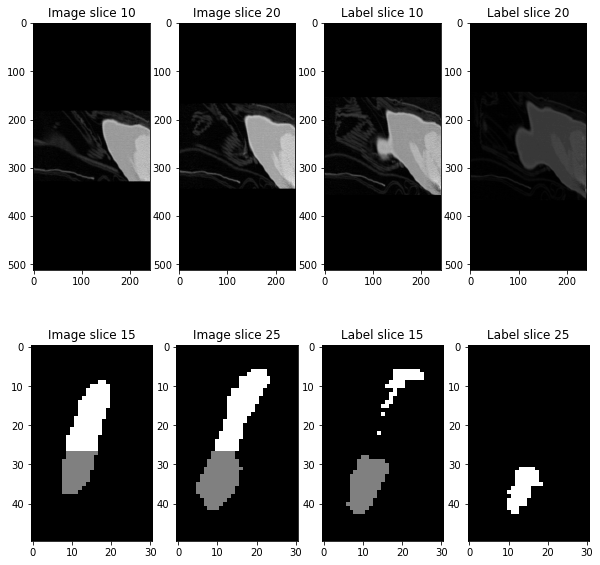

In [12]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)

img_np = image.get_fdata()
img_np.shape

lbl_np = label.get_fdata()
lbl_np.shape
# Now try to visualize slices from the dataset

plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(241)
plt.imshow(img_np[10,:,:], cmap='gray')
plt.title('Image slice 10')
plt.subplot(245)
plt.imshow(lbl_np[10,:,:], cmap='gray')
plt.title('Image slice 15')
plt.subplot(242)
plt.imshow(img_np[15,:,:], cmap='gray')
plt.title('Image slice 20')
plt.subplot(246)
plt.imshow(lbl_np[15,:,:], cmap='gray')
plt.title('Image slice 25')
plt.subplot(243)
plt.imshow(img_np[20,:,:], cmap='gray')
plt.title('Label slice 10')
plt.subplot(247)
plt.imshow(lbl_np[20,:,:], cmap='gray')
plt.title('Label slice 15')
plt.subplot(244)
plt.imshow(img_np[25,:,:], cmap='gray')
plt.title('Label slice 20')
plt.subplot(248)
plt.imshow(lbl_np[25,:,:], cmap='gray')
plt.title('Label slice 25')


Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [5]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [13]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?
image.header_class

nibabel.nifti1.Nifti1Header

In [14]:
#Let's print the entire header to get lot more characteristics
n1_header = image.header
print(n1_header) 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 241   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.597656  0.597656  1.25      0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 144.2
qoffset_y       : -152.40222
qoffset_z

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [15]:
image.shape

(512, 512, 241)

In [16]:
# TASK: How many bits per pixel are used?
#__solution 
print('Bits per pixel {}'. format(image.header['bitpix']))

Bits per pixel 32


In [17]:
# TASK: What are the units of measurement?
#__solution
print('Units of measurement {}'.format(image.header['xyzt_units']))

Units of measurement 10


In [18]:
# TASK: Do we have a regular grid? What are grid spacings?
#__solution
#grid spacing can be found in pixdim
print('Grid spacings: {}'.format(image.header['pixdim']))

Grid spacings: [-1.        0.597656  0.597656  1.25      0.        0.        0.
  0.      ]


In [19]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?
#__solution
# We use image shape to derive these
print('Sagital dimension: {}x{}'.format(image.shape[1], image.shape[2]))
print('Coronal dimension: {}x{}'.format(image.shape[0], image.shape[2]))
print('Axial dimension: {}x{}'.format(image.shape[0], image.shape[1]))

Sagital dimension: 512x241
Coronal dimension: 512x241
Axial dimension: 512x512


As per the documentation, here is how we can find the dimensions: 
    Predefined dimensions for space and time
In the nifti format, the first three dimensions are reserved to define the three spatial 
dimensions — x, y and z —, while the fourth dimension is reserved to define the time 
points — t. 
The remaining dimensions, from fifth to seventh, are for other uses. 
The fifth dimension, however, can still have some predefined uses, such as to store 
voxel-specific distributional parameters or to hold vector-based data.

In [20]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500
print('Hippocampus volume: {} mm^3'.format(np.sum(lbl_np > 0)))

Hippocampus volume: 3456 mm^3


## Plotting some charts

<img src="img/nomogram_fem_right.svg" width=400 align=left>

In [22]:
def find_volume(label):
    return np.sum(label > 0)

In [53]:
#__solution
volume = []
for nifile in os.listdir(path):
    fname = path+nifile
    lab = nib.load(fname)
    volume.append([fname, find_volume(lab.get_fdata())])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e71031490>]],
      dtype=object)

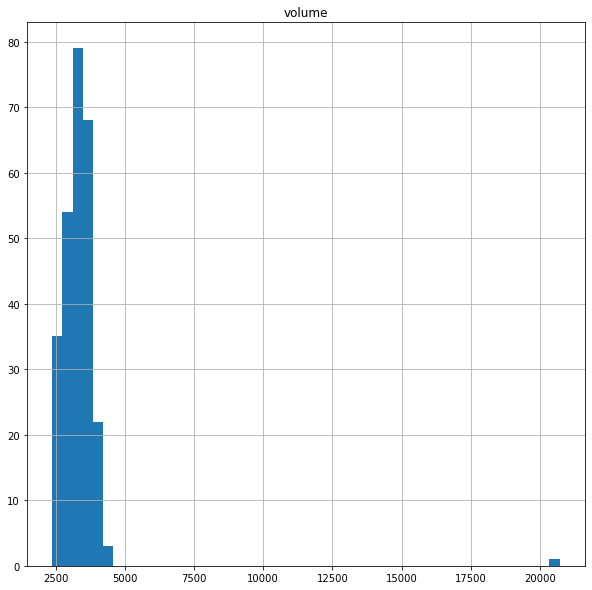

In [54]:
volume_df = pd.DataFrame(volume, columns=['name', 'volume'])
volume_df.hist(column='volume', bins=50)

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

In [55]:
volume_df.sample(5)

,name,volume
8,/data/TrainingSet/labels/hippocampus_260.nii.gz,3097
164,/data/TrainingSet/labels/hippocampus_322.nii.gz,3450
240,/data/TrainingSet/labels/hippocampus_010.nii.gz,3456
29,/data/TrainingSet/labels/hippocampus_056.nii.gz,3733
135,/data/TrainingSet/labels/hippocampus_226.nii.gz,2546


In [56]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
#__solution
# As mentioned earlier, we should have the volume of the hippocampus within the range. 
# so, anything > 4500 mmm and less than < 2200 should be considered an outlier
# we don't have any below  2000, 4500 should be a good criteria as we see some files with 20k mmm volume

import shutil

outlier = volume_df[volume_df.volume > 4500]
volume_df = volume_df.drop(index = outlier.index[0])


Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [57]:
outlier

,name,volume
200,/data/TrainingSet/labels/hippocampus_281.nii.gz,20702


In [58]:
len(volume_df)

261

In [59]:
volume_df.head(5)

,name,volume
0,/data/TrainingSet/labels/hippocampus_376.nii.gz,3581
1,/data/TrainingSet/labels/hippocampus_165.nii.gz,3023
2,/data/TrainingSet/labels/hippocampus_286.nii.gz,3172
3,/data/TrainingSet/labels/hippocampus_152.nii.gz,3994
4,/data/TrainingSet/labels/hippocampus_176.nii.gz,2920


In [61]:
!pwd

/home/workspace


In [63]:
for f in volume_df.name:
    shutil.copy(f, './section1/out')

## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!